In [1]:
import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#PCA
from sklearn.decomposition import PCA

#Clustering
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

import math
from math import ceil

import warnings
warnings.filterwarnings('ignore')

%config InlineBackend.figure_format = 'retina'

sns.set()

In [2]:
%store -r df
%store -r df_scaled

In [3]:
df_scaled.shape

(31875, 47)

In [4]:
df.shape

(31875, 60)

#### PCA

In [5]:
df_pca = df_scaled.loc[:, ~df_scaled.columns.str.startswith('HR')].set_index(df_scaled.index)
df_pca.shape

(31875, 23)

In [6]:
pca = PCA()
pca_feat = pca.fit_transform(df_pca)

In [7]:
# Get PCA output as table

# Get the eigenvalues (explained variance)
explained_variance = pca.explained_variance_

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# get the cumulative explained variance ratio 
# Hint: use np.cumsum()
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

# Combine into a dataframe
pca_results = pd.DataFrame(
    {
        "Eigenvalue": explained_variance,
        "Difference": np.insert(np.diff(explained_variance), 0, 0),
        "Proportion": explained_variance_ratio,
        "Cumulative": cumulative_explained_variance_ratio
    },
        index=range(1, pca.n_components_ + 1)
)

pca_results

,Eigenvalue,Difference,Proportion,Cumulative
1,9.528307e+00,0.000000e+00,4.142612e-01,0.414261
2,3.302682e+00,-6.225625e+00,1.435904e-01,0.557852
3,2.478566e+00,-8.241165e-01,1.077603e-01,0.665612
4,2.049615e+00,-4.289509e-01,8.911089e-02,0.754723
5,1.052765e+00,-9.968503e-01,4.577094e-02,0.800494
6,9.679813e-01,-8.478326e-02,4.208482e-02,0.842579
7,8.701238e-01,-9.785745e-02,3.783028e-02,0.880409
8,7.463186e-01,-1.238052e-01,3.244762e-02,0.912857
9,5.485517e-01,-1.977670e-01,2.384932e-02,0.936706
10,4.151868e-01,-1.333648e-01,1.805104e-02,0.954757


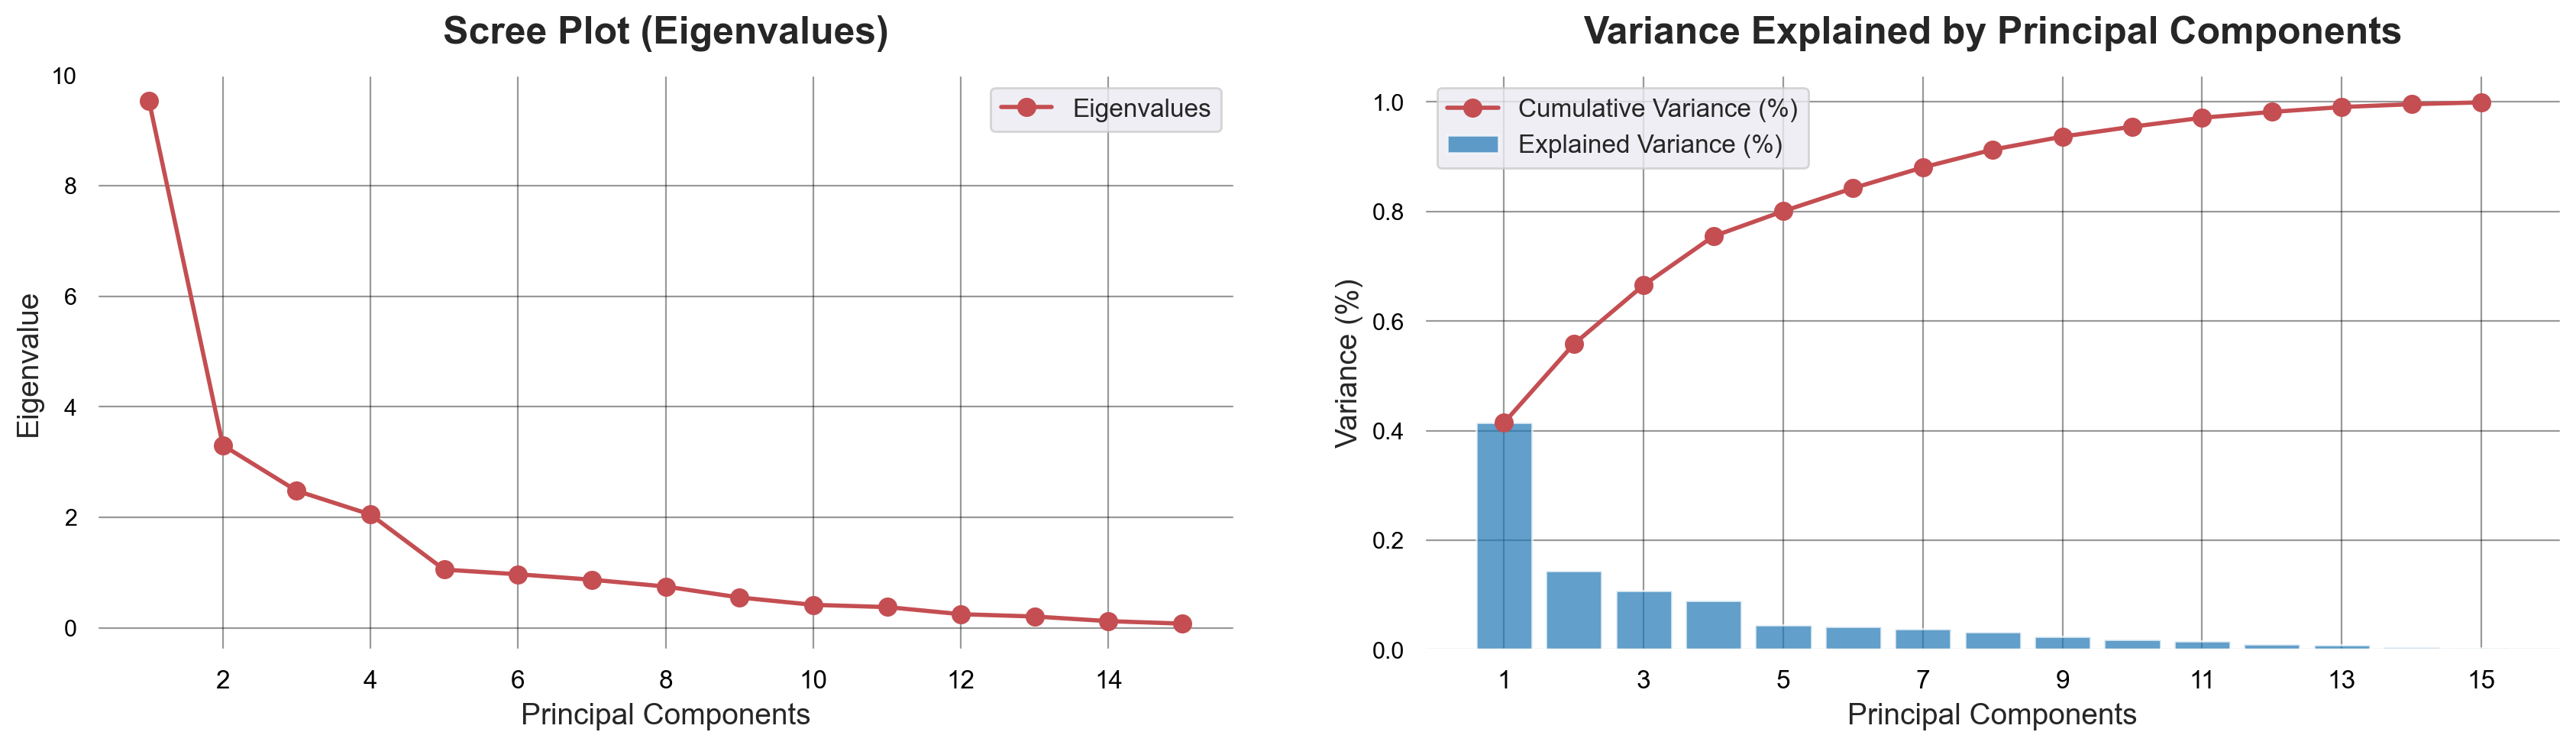

In [8]:
n_pcas = 15

# Create figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6), facecolor='white')

# Plot 1: Scree Plot (Eigenvalues)
ax1.plot(range(1, n_pcas + 1), explained_variance[:n_pcas], 'ro-', linewidth=2, markersize=8, label='Eigenvalues')
ax1.set_title("Scree Plot (Eigenvalues)", fontsize=18, pad=15, fontweight='bold')
ax1.set_xlabel("Principal Components", fontsize=14)
ax1.set_ylabel("Eigenvalue", fontsize=14)
ax1.set_xticks(range(2, n_pcas + 1, 2))
ax1.set_xticklabels(range(2, n_pcas + 1, 2), fontsize=12)
ax1.set_facecolor('white')
ax1.grid(True, color='black', linestyle='-', linewidth=0.8, alpha=0.4)  # Lighter grid lines
ax1.tick_params(axis='both', which='both', colors='black', width=1)  # Black ticks with better visibility
ax1.legend(fontsize=12, loc='upper right')

# Plot 2: Explained Variance as a Bar Chart (up to 30 PCs)
ax2.bar(range(1, n_pcas + 1), explained_variance_ratio[:n_pcas], 
        color='#1f77b4', alpha=0.7, label='Explained Variance (%)', width=0.8)  # Customize bar color
ax2.plot(range(1, n_pcas + 1), cumulative_explained_variance_ratio[:n_pcas], 
         'ro-', linewidth=2, markersize=8, label='Cumulative Variance (%)')

# Customize the plot
ax2.set_title("Variance Explained by Principal Components", fontsize=18, pad=15, fontweight='bold')
ax2.set_xlabel("Principal Components", fontsize=14)
ax2.set_ylabel("Variance (%)", fontsize=14)
ax2.set_xticks(range(1, n_pcas + 1, 2))  # Show every 2nd PC for clarity
ax2.set_xticklabels(range(1, n_pcas + 1, 2), fontsize=12)
ax2.set_facecolor('white')
ax2.grid(True, color='black', linestyle='-', linewidth=0.8, alpha=0.4)  # Lighter grid lines
ax2.tick_params(axis='both', which='both', colors='black', width=1)  # Black ticks with better visibility

# Add legend
ax2.legend(fontsize=12, loc='upper left')

# Adjust layout to ensure everything fits and has proper padding
plt.tight_layout(pad=4.0)

# Show plot
plt.show()


 Cumulative percentage of total variance
* keep 80% of total variance
 Kaiser's rule
* keep PC var >=1
 Scree plot
* elbow method

In [9]:
# we decided to retain 5 PCAs as its an Elbow and allows us to retain around 80% of variance as well as around 1 PC variance
pca = PCA(n_components=5)
pca_feat = pca.fit_transform(df_pca)
pca_feat_names = [f"PC{i}" for i in range(pca.n_components_)]

# remember index=df_pca.index
pca_df = pd.DataFrame(pca_feat, index=df_pca.index, columns=pca_feat_names)  

In [10]:
df_pca_final = pd.concat([df_pca, pca_df], axis=1)
correlation_matrix = df_pca_final[pca_feat_names + df_pca.columns.tolist()].corr()
loadings = correlation_matrix.loc[pca_feat_names, df_pca.columns]

def _color_red_or_green(val):
    if val < -0.45:
        color = 'background-color: #ffbdbd'
    elif val > 0.45:
        color = 'background-color: #b3ffcc'
    else:
        color = ''
    return color

loadings.style.applymap(_color_red_or_green)

,vendor_count,product_count,is_chain,first_order,last_order,CUI_American,CUI_Asian,Total_Orders_Per_Client,mnt,mnt_Per_Order,Items_Per_Order,frq,rcn,activity,CUI_diversity,Loyalty,Recency_Score,Frequency_Score,Monetary_Score,CLV_Score,CUI_Other,Weekday_orders,Weekend_orders
PC0,0.865635,0.940314,0.797190,-0.421835,0.534358,0.377386,0.369731,0.936388,0.822654,-0.083098,0.093072,-0.442568,-0.534358,0.765966,0.772055,0.489298,0.436898,-0.442568,0.822654,0.183153,0.746467,0.850385,0.816223
PC1,0.000678,0.193577,0.010083,0.391206,-0.168887,0.076594,0.270132,0.093569,0.371731,0.600789,0.482444,0.763650,0.168887,-0.455247,-0.152192,-0.154292,0.122618,0.763650,0.371731,0.747892,0.297581,0.095925,0.067699
PC2,0.091097,0.142087,0.097230,-0.621608,-0.764346,0.054745,0.086891,0.107853,0.161396,0.112693,0.144296,0.010108,0.764346,-0.083080,0.056708,0.000637,-0.710010,0.010108,0.161396,-0.473895,0.143070,0.098219,0.093669
PC3,-0.177760,-0.130665,-0.385893,-0.041038,0.189998,0.048801,0.444899,-0.254349,0.284152,0.663609,0.582964,-0.403700,-0.189998,0.182293,-0.198483,-0.003456,-0.028836,-0.403700,0.284152,-0.255639,0.063616,-0.230612,-0.222186
PC4,-0.326184,0.004202,-0.078873,-0.029796,-0.040934,0.466726,0.074237,0.035272,0.097089,-0.102375,-0.219947,0.028907,0.040934,-0.007337,-0.413595,0.669861,0.018722,0.028907,0.097089,0.058199,-0.079762,0.036411,0.025203


In [11]:
df_pca_final.shape

(31875, 28)

### Clustering

In [12]:
metric_features = df_pca_final.select_dtypes(include=np.number).set_index(df_pca_final.index).columns.tolist()
pc_features = df_pca_final.columns[df_pca_final.columns.str.startswith('PC')].tolist()
non_metric_features = df.columns[df.columns.str.startswith(('customer_', 'last_', 'payment_'))].tolist()
non_metric_features_df = df.loc[:, non_metric_features].set_index(df.index)

In [14]:
non_metric_features_df.shape

(31875, 14)

In [15]:
df_pca_final.shape

(31875, 28)

In [16]:
df = pd.concat([df_pca_final, non_metric_features_df], axis=1)

In [17]:
df.shape

(31888, 42)

In [18]:
df.fillna(0, inplace = True)

#### Hierarchical Clustering

In [19]:
# Performing HC
hclust = AgglomerativeClustering(linkage='ward', metric='euclidean', n_clusters=5)
hc_labels = hclust.fit_predict(df[metric_features])

In [20]:
# Characterizing the clusters
labels_series = pd.Series(hc_labels, 
                          name='labels', 
                          index=df.index 
                          ) 

df_concat = pd.concat(
    [df, labels_series],
    axis=1)

df_concat[metric_features+['labels']].groupby('labels').mean()

,vendor_count,product_count,is_chain,first_order,last_order,last_order,CUI_American,CUI_Asian,Total_Orders_Per_Client,mnt,...,Monetary_Score,CLV_Score,CUI_Other,Weekday_orders,Weekend_orders,PC0,PC1,PC2,PC3,PC4
labels,,,,,,,,,,,,,,,,,,,,,
0,-0.111678,-0.191937,-0.135116,-0.140651,0.078447,0.051214,-0.086951,-0.112941,-0.166620,-0.214259,...,-0.214259,-0.531764,-0.186672,-0.158624,-0.135988,-0.231594,-1.086636,-0.002729,0.303218,-0.011590
1,3.597109,4.408009,3.957368,-0.985508,0.917294,0.914123,1.874916,1.015170,4.412305,3.467074,...,3.467074,1.659326,3.428295,4.011591,3.840338,11.890448,2.854522,1.247304,-2.288224,0.105384
2,-0.636626,-0.494169,-0.518332,1.627391,0.376101,0.417591,-0.262700,-0.053648,-0.582914,-0.272959,...,-0.272959,1.074146,-0.248429,-0.519276,-0.520895,-2.057263,2.277182,-1.611915,0.096863,-0.202870
3,1.228758,1.191553,0.958705,-0.691749,0.755300,0.748203,0.583714,0.678478,1.195026,1.183140,...,1.183140,0.440881,0.956438,1.091324,1.034004,4.242670,0.175068,-0.086605,0.116205,0.092540
4,-0.723893,-0.596971,-0.530350,0.158968,-1.364740,-1.281403,-0.264235,-0.268335,-0.636803,-0.521270,...,-0.521270,0.683430,-0.440399,-0.563016,-0.574450,-3.118683,2.055321,1.033207,-1.014593,0.090152


In [21]:
def get_ss(df, feats):
    """
    Calculate the sum of squares (SS) for the given DataFrame.
    The sum of squares is computed as the sum of the variances of each column
    multiplied by the number of non-NA/null observations minus one.
    Parameters:
    df (pandas.DataFrame): The input DataFrame for which the sum of squares is to be calculated.
    feats (list of str): A list of feature column names to be used in the calculation
    Returns:
    float: The sum of squares of the DataFrame.
    """
    df_ = df[feats]
    ss = np.sum(df_.var() * (df_.count() - 1))
    return ss 

def get_ssb(df, feats, label_col):
    """
    Calculate the between-group sum of squares (SSB) for the given DataFrame.
    The between-group sum of squares is computed as the sum of the squared differences
    between the mean of each group and the overall mean, weighted by the number of observations
    in each group.
    Parameters:
    df (pandas.DataFrame): The input DataFrame containing the data.
    feats (list of str): A list of feature column names to be used in the calculation.
    label_col (str): The name of the column in the DataFrame that contains the group labels.
    Returns
    float: The between-group sum of squares of the DataFrame.
    """
    ssb_i = 0
    for i in np.unique(df[label_col]):
        df_ = df.loc[:, feats]
        X_ = df_.values
        X_k = df_.loc[df[label_col] == i].values
        
        ssb_i += (X_k.shape[0] * (np.square(X_k.mean(axis=0) - X_.mean(axis=0))) )

    ssb = np.sum(ssb_i)
    return ssb

def get_ssw(df, feats, label_col):
    """
    Calculate the sum of squared within-cluster distances (SSW) for a given DataFrame.
    Parameters:
    df (pandas.DataFrame): The input DataFrame containing the data.
    feats (list of str): A list of feature column names to be used in the calculation.
    label_col (str): The name of the column containing cluster labels.
    Returns:
    float: The sum of squared within-cluster distances (SSW).
    """
    feats_label = feats+[label_col]
    df_k = df[feats_label].groupby(by=label_col).apply(lambda col: get_ss(col, feats))
    return df_k.sum()

df_sst_ = get_ss(df_concat, metric_features)
df_ssb_ = get_ssb(df_concat, metric_features, 'labels')
df_ssw_ = get_ssw(df_concat, metric_features, 'labels')

print("SSb:  ", df_ssb_)
print("SSw:  ", df_ssw_)
print("SSt:  ", df_sst_)
print("SSt == SSb+SSw ? ", np.isclose(df_sst_, df_ssb_ + df_ssw_, atol=1))

SSb:   674202.6362800624
SSw:   677659.3669615753
SSt:   1351862.0032416566
SSt == SSb+SSw ?  True


In [22]:
def get_rsq(df, feats, label_col):
    """
    Calculate the R-squared value for a given DataFrame and features.

    Parameters:
    df (pd.DataFrame): The input DataFrame containing the data.
    feats (list): A list of feature column names to be used in the calculation.
    label_col (str): The name of the column containing the labels or cluster assignments.

    Returns:
    float: The R-squared value, representing the proportion of variance explained by the clustering.
    """

    df_sst_ = get_ss(df, feats)                 # get total sum of squares
    df_ssw_ = get_ssw(df, feats, label_col)     # get ss within
    df_ssb_ = df_sst_ - df_ssw_                 # get ss between

    # r2 = ssb/sst 
    return (df_ssb_/df_sst_)

def get_r2_hc(df, link_method, max_nclus, min_nclus=1, dist="euclidean"):
    """This function computes the R2 for a set of cluster solutions given by the application of a hierarchical method.
    The R2 is a measure of the homogenity of a cluster solution. It is based on SSt = SSw + SSb and R2 = SSb/SSt. 
    
    Parameters:
    df (DataFrame): Dataset to apply clustering
    link_method (str): either "ward", "complete", "average", "single"
    max_nclus (int): maximum number of clusters to compare the methods
    min_nclus (int): minimum number of clusters to compare the methods. Defaults to 1.
    dist (str): distance to use to compute the clustering solution. Must be a valid distance. Defaults to "euclidean".
    
    Returns:
    ndarray: R2 values for the range of cluster solutions
    """
    
    r2 = []  # where we will store the R2 metrics for each cluster solution
    feats = df.columns.tolist()
    
    for i in range(min_nclus, max_nclus+1):  # iterate over desired ncluster range
        cluster = AgglomerativeClustering(n_clusters=i, metric=dist, linkage=link_method)
        
        #get cluster labels
        hclabels = cluster.fit_predict(df) 
        
        # concat df with labels
        df_concat = pd.concat([df, pd.Series(hclabels, name='labels', index=df.index)], axis=1)  
        
        
        # append the R2 of the given cluster solution
        r2.append(get_rsq(df_concat, feats, 'labels'))
        
    return np.array(r2)

In [23]:
hc_methods = ["ward", "complete", "average", "single"]
max_nclus = 10

r2_hc = np.vstack([ get_r2_hc(df[metric_features], 
                              link, 
                              max_nclus=max_nclus, 
                              min_nclus=1, 
                              dist="euclidean") 
                              for link in hc_methods])

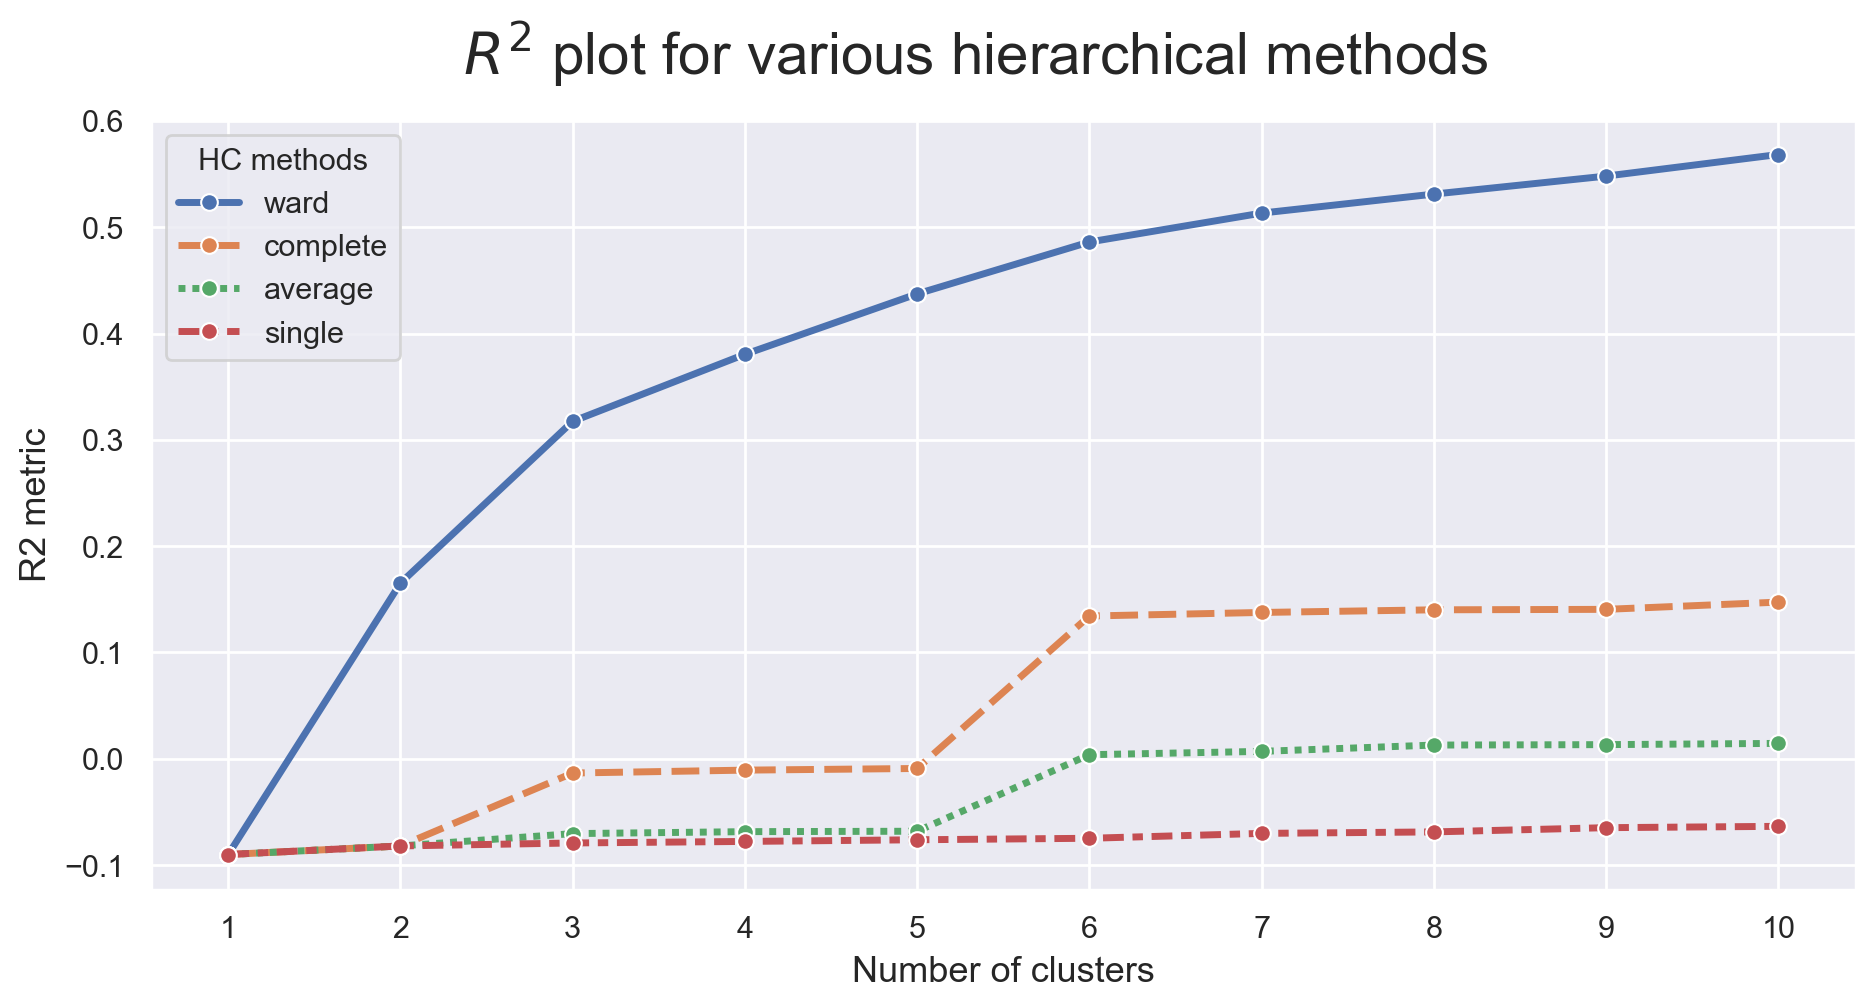

In [24]:
r2_hc_methods = pd.DataFrame(r2_hc.T, index=range(1, max_nclus + 1), columns=hc_methods)

sns.set()

# Plot data
fig = plt.figure(figsize=(11,5))
sns.lineplot(data=r2_hc_methods, linewidth=2.5, markers=["o"]*4)

# Finalize the plot
plt.legend(title="HC methods", title_fontsize=11)
plt.xticks(range(1, max_nclus + 1))
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R2 metric", fontsize=13)

fig.suptitle("$R^2$ plot for various hierarchical methods", fontsize=21)

plt.show()

#### Defining Number of Clusters

In [25]:
# setting distance_threshold=0 and n_clusters=None ensures we compute the full tree
linkage = 'ward'
distance = 'euclidean'

hclust = AgglomerativeClustering(linkage=linkage, metric=distance, distance_threshold=0, n_clusters=None)
hclust.fit_predict(df[metric_features])

# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

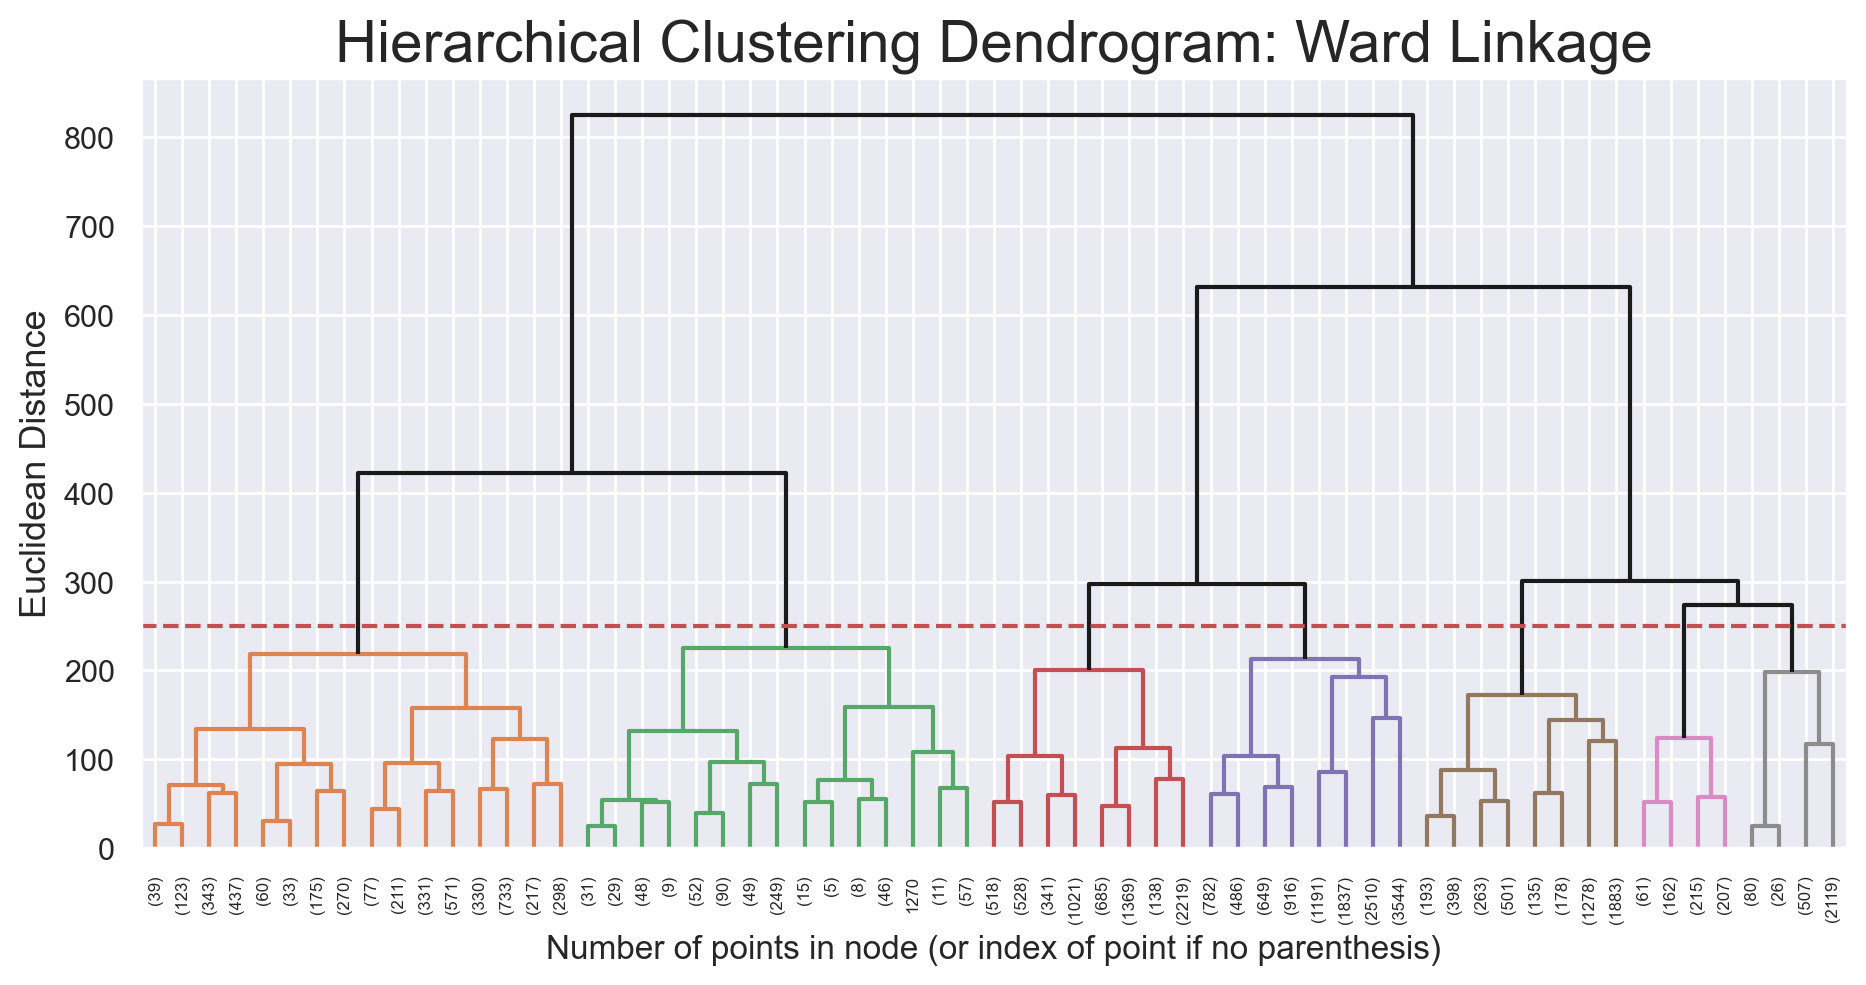

In [29]:
# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned
y_threshold = 250
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering Dendrogram: {linkage.title()} Linkage', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'{distance.title()} Distance', fontsize=13)
plt.show()